In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
df = pd.read_csv('train.csv')

In [38]:
df.shape

(404290, 6)

In [39]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
374425,374425,505329,505330,Why is Jaane Bhi Do Yaaro (1983) considered a ...,Why do films in India are consider a success i...,0
382582,382582,514444,514445,I am a 19 years old boy who just passed to the...,What is tap?,0
350939,350939,920,34999,What are the top 10 books one should read in h...,List 20 must read books to be read in your ear...,1
26594,26594,49473,49474,I am a 23-year-old Indian guy who is an engine...,I am a 23 year old guy. I want to start a busi...,0
7345,7345,14352,14353,Vision (eyesight): What are some tricks to spe...,Why does death cause a dilated pupil?,0


In [40]:
new_df = df.sample(30000,random_state = 2)

In [41]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [42]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [43]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)

is_duplicate
0    19013
1    10987
Name: count, dtype: int64
is_duplicate
0    63.376667
1    36.623333
Name: count, dtype: float64


In [44]:
# Repreated Questions 

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x= qid.value_counts() >1
print("Number of questions getting repeated",x[x].shape[0])

Number of unique questions 55299
Number of questions getting repeated 3480


In [45]:
# Repeated Question Histogram

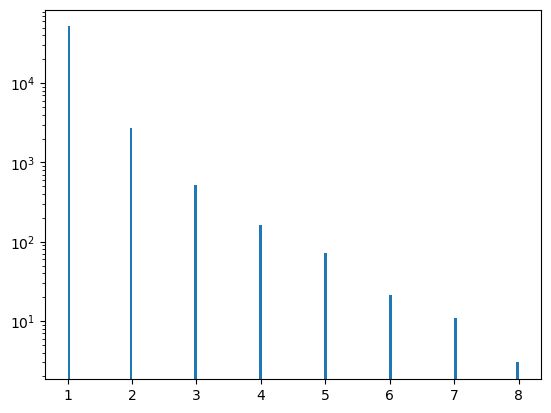

In [46]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [47]:
# feature Engineering 

In [48]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [49]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [50]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split()))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split()))

In [51]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9
...,...,...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1,42,41,7,7
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0,68,61,12,12
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0,73,98,14,17
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1,51,45,10,10


In [52]:
# Common words
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(),row['question1'].split()))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split()))
    return len(w1 & w2)

In [53]:
set(map(lambda word: word.lower().strip(),"I am poor but I want to invest. What should I do?".split()))

{'am', 'but', 'do?', 'i', 'invest.', 'poor', 'should', 'to', 'want', 'what'}

In [54]:
new_df['word_common'] = new_df.apply(common_words,axis=1)

In [55]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3
...,...,...,...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1,42,41,7,7,6
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0,68,61,12,12,4
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0,73,98,14,17,4
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1,51,45,10,10,5


In [90]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(),row['question1'].split()))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split()))
    return len(w1)  +len(w2)

In [102]:
new_df['word_share'] = new_df['word_common']/new_df['word_total']  

In [103]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.458333
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.304348
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.058824
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.000000
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1,42,41,7,7,6,14,0.428571
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0,68,61,12,12,4,24,0.166667
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0,73,98,14,17,4,30,0.133333
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1,51,45,10,10,5,20,0.250000


In [92]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1,42,41,7,7,6,14
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0,68,61,12,12,4,24
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0,73,98,14,17,4,30
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1,51,45,10,10,5,20


minimum characters 2
maximum characters 391
average num of characters 59


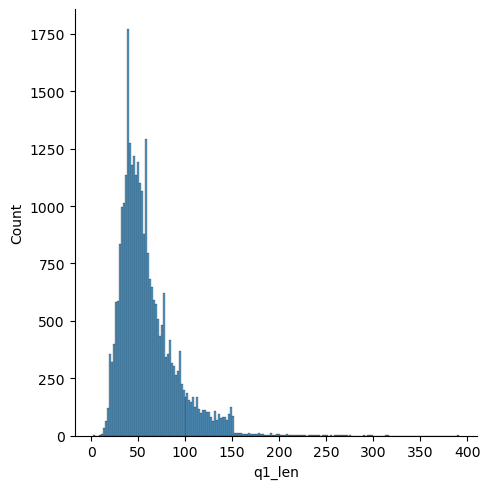

In [93]:
# Analysis of features
sns.displot(new_df['q1_len'])
print("minimum characters",new_df['q1_len'].min())
print("maximum characters",new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 6
maximum characters 1151
average num of characters 60


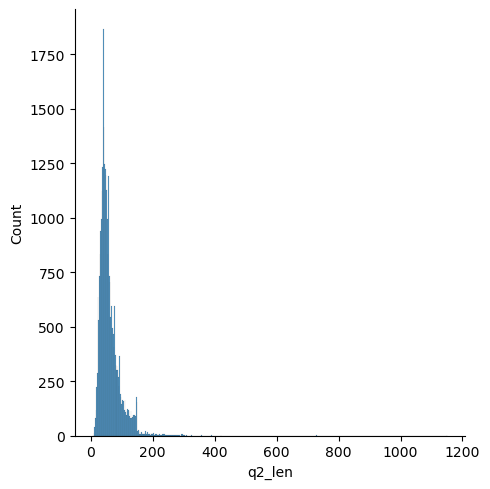

In [94]:
sns.displot(new_df['q2_len'])
print("minimum characters",new_df['q2_len'].min())
print("maximum characters",new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maxmum words 72
Average num of words 10


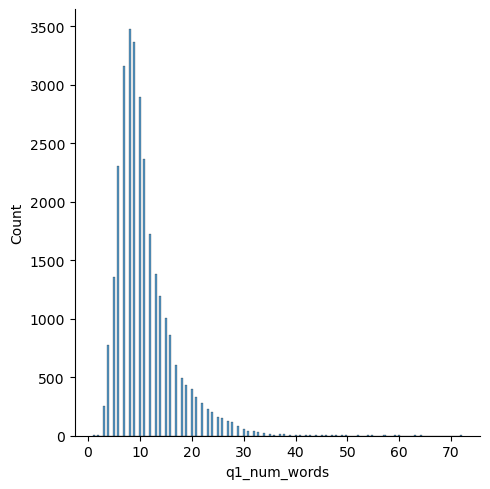

In [95]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maxmum words',new_df['q1_num_words'].max())
print("Average num of words",int(new_df['q1_num_words'].mean()))

minimum words 1
maxmum words 237
Average num of words 11


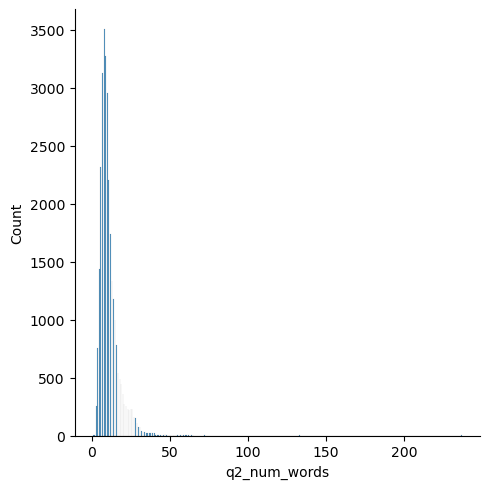

In [96]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maxmum words',new_df['q2_num_words'].max())
print("Average num of words",int(new_df['q2_num_words'].mean()))

C:\Users\ahmed\AppData\Local\Temp\ipykernel_37400\3637998322.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0 ]['word_common'],label = 'non_duplicate')
C:\Users\ahmed\AppData\Local\Temp\ipykernel_37400\3637998322.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

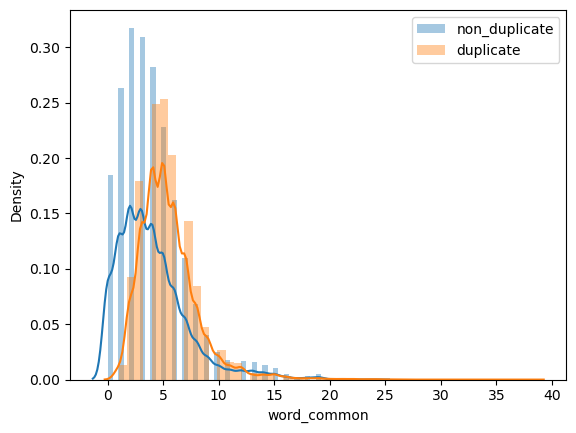

In [97]:
# Common Words(We will see for Common words for duplicate and non-duplicate words)
sns.distplot(new_df[new_df['is_duplicate'] == 0 ]['word_common'],label = 'non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] ==1 ]['word_common'],label = 'duplicate')
plt.legend()
plt.show()

In [98]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1,42,41,7,7,6,14
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0,68,61,12,12,4,24
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0,73,98,14,17,4,30
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1,51,45,10,10,5,20


In [99]:
# Duplicate questions have more words in common than the non-duplicate words, <4 non_duplicate word re more 
# But >4, number of duplicate questions are more in >4 range till end. (Implying that more no. of common words are found in Duplicate words than non_duplicate

C:\Users\ahmed\AppData\Local\Temp\ipykernel_37400\3773542962.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0 ]['word_total'],label = 'non duplicate')
C:\Users\ahmed\AppData\Local\Temp\ipykernel_37400\3773542962.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

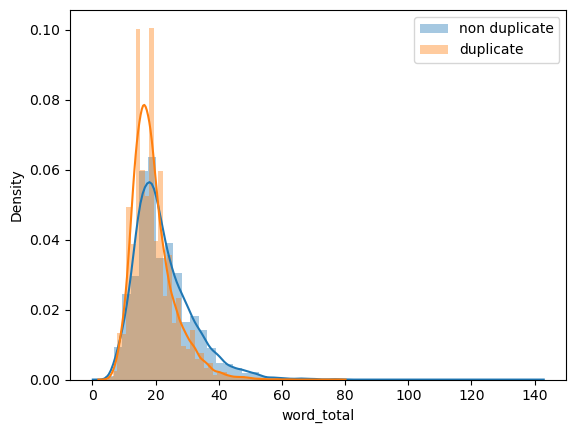

In [100]:
# total Words
sns.distplot(new_df[new_df['is_duplicate'] == 0 ]['word_total'],label = 'non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] ==1 ]['word_total'],label = 'duplicate')
plt.legend()
plt.show()

In [101]:
# hera till 20 Duplicate questions are more but from 25/30 non_duplicate's total number of words are more(Relatively) goes till 140 also

C:\Users\ahmed\AppData\Local\Temp\ipykernel_37400\495687642.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0 ]['word_share'],label = 'non duplicate')
C:\Users\ahmed\AppData\Local\Temp\ipykernel_37400\495687642.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

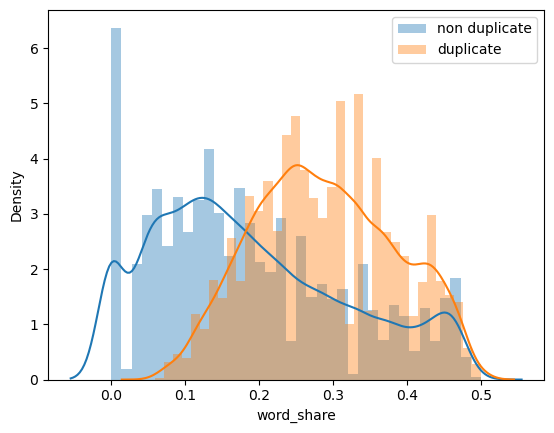

In [104]:
# Word Share
sns.distplot(new_df[new_df['is_duplicate'] == 0 ]['word_share'],label = 'non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] ==1 ]['word_share'],label = 'duplicate')
plt.legend()
plt.show()

In [105]:
## Duplicate has more word_share than non_duplicate questions (0-0.2 for non-duplicate 0.3-0.5+ for duplicate)

In [106]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.458333
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.304348
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.058824
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.000000
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1,42,41,7,7,6,14,0.428571
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0,68,61,12,12,4,24,0.166667
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0,73,98,14,17,4,30,0.133333
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1,51,45,10,10,5,20,0.250000


In [107]:
# We will make a question df where only the question sentences are there
ques_df = new_df[['question1','question2']]

In [108]:
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [110]:
final_df = new_df.drop(['id','qid1','qid2','question1','question2'],axis=1)
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,1,76,77,12,12,11,24,0.458333
115086,0,49,57,12,15,7,23,0.304348
327711,0,105,120,25,17,2,34,0.058824
367788,0,59,146,12,30,0,32,0.000000
151235,0,35,50,5,9,3,13,0.230769


In [111]:
## now we will vectorize the words using BOW (First)

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts 
questions = list(ques_df['question1']) + list(ques_df['question1'])


In [115]:
cv = CountVectorizer(max_features =3000)

In [118]:
q1_arr,q2_arr =np.vsplit(cv.fit_transform(questions).toarray(),2)

In [121]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [122]:
final_df = pd.concat([final_df,temp_df],axis=1) ## we vectorize the sentences and then put them bakc into the main sentence
print(final_df.shape)

(30000, 6008)


In [123]:
final_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.458333,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.304348,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.058824,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.230769,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243932,1,42,41,7,7,6,14,0.428571,0,0,...,0,0,0,0,0,0,0,0,0,0
91980,0,68,61,12,12,4,24,0.166667,0,0,...,0,0,0,0,0,0,0,0,0,0
266955,0,73,98,14,17,4,30,0.133333,0,0,...,0,0,1,0,0,0,0,0,0,0
71112,1,51,45,10,10,5,20,0.250000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size = 0.2,random_state =42)

In [128]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7635

In [130]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_pred,y_test)

0.7618333333333334

In [131]:
# To improve our accuracy we would need to do preprocessing and also add ADVANCED Features 